In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [37]:
bus_normal = pd.read_csv('../20250317/arrival_records_merge_normal_re2.csv')
bus_grandprix = pd.read_csv('../20250317/arrival_records_merge_grandprix_re2.csv')

C:\Users\gennw\AppData\Local\Temp\ipykernel_8280\3715786524.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_normal = pd.read_csv('../20250317/arrival_records_merge_normal_re2.csv')


In [38]:
bus_normal['hour'] = pd.to_datetime(bus_normal['time']).dt.hour 
bus_grandprix['hour'] = pd.to_datetime(bus_grandprix['time']).dt.hour

C:\Users\gennw\AppData\Local\Temp\ipykernel_8280\27032078.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bus_normal['hour'] = pd.to_datetime(bus_normal['time']).dt.hour
C:\Users\gennw\AppData\Local\Temp\ipykernel_8280\27032078.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bus_grandprix['hour'] = pd.to_datetime(bus_grandprix['time']).dt.hour


In [39]:
combined = pd.concat([bus_normal[['endStation']], bus_grandprix[['endStation']]], ignore_index=True)
_, unique_values = pd.factorize(combined['endStation'])
value_to_code = {val: code for code, val in enumerate(unique_values)}
bus_normal['endStation'] = bus_normal['endStation'].map(value_to_code)
bus_grandprix['endStation'] = bus_grandprix['endStation'].map(value_to_code)

In [40]:
bus_normal

,route,startStation,endStation,time,weekday,passengerFlow,trafficCondition,busPlate,arrivalDuration,hour
0,3,M1/9,0,12:15:05,2,-1,-1,MX1601,137,12
1,3,M161,1,12:15:29,2,-1,-1,MX2215,47,12
2,3,M161,1,12:15:46,2,2,-1,MX2108,40,12
3,3,M135/2,2,12:16:14,2,-1,-1,AA3137,92,12
4,3,M70,3,12:16:25,2,-1,-1,MX2215,24,12
...,...,...,...,...,...,...,...,...,...,...
179185,AP1,T344,151,11:51:39,0,-1,1,AA7336,16,11
179186,AP1,T408/6,83,11:51:46,0,-1,1,AA7730,109,11
179187,AP1,M239/2,146,11:52:10,0,-1,1,AA6719,46,11
179188,AP1,T343,154,11:52:10,0,-1,1,AA7793,401,11


In [41]:
selected_feature = ['endStation', 'hour','weekday', 'passengerFlow', 'trafficCondition', 'arrivalDuration']
bus_normal = bus_normal[selected_feature]
bus_grandprix = bus_grandprix[selected_feature]
bus_normal

,endStation,hour,weekday,passengerFlow,trafficCondition,arrivalDuration
0,0,12,2,-1,-1,137
1,1,12,2,-1,-1,47
2,1,12,2,2,-1,40
3,2,12,2,-1,-1,92
4,3,12,2,-1,-1,24
...,...,...,...,...,...,...
179185,151,11,0,-1,1,16
179186,83,11,0,-1,1,109
179187,146,11,0,-1,1,46
179188,154,11,0,-1,1,401


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
bus_normal = scaler.fit_transform(bus_normal)
bus_grandprix = scaler.transform(bus_grandprix)

In [44]:
pca_normal = PCA()
pca_normal.fit(bus_normal)
pca_grandprix = PCA()
pca_grandprix.fit(bus_grandprix)

PCA()

In [45]:
print("Explained variance ratio per component:", pca_normal.explained_variance_ratio_)
cumulative_variance_ratio = np.cumsum(pca_normal.explained_variance_ratio_)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

Explained variance ratio per component: [0.2110703  0.17715813 0.17198854 0.16202971 0.15064358 0.12710974]
Cumulative explained variance ratio: [0.2110703  0.38822843 0.56021697 0.72224669 0.87289026 1.        ]


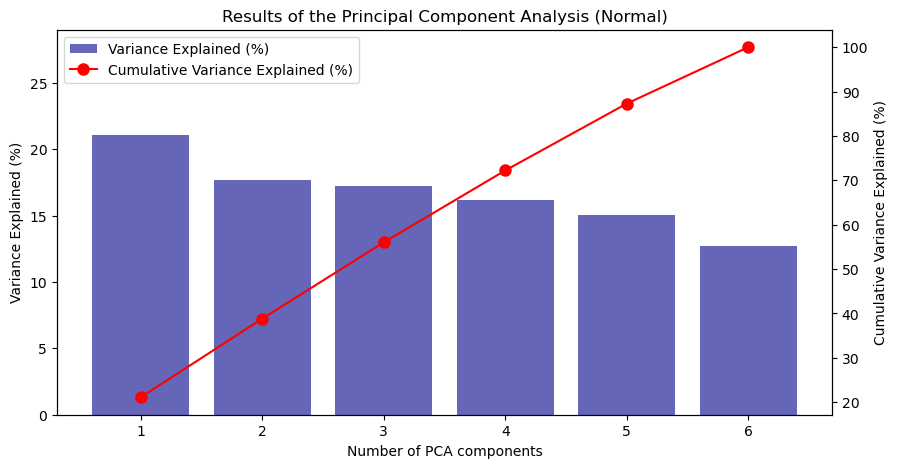

In [46]:
var_exp = pca_normal.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.6, align='center', color='darkblue', label='Variance Explained (%)')
ax1.set_ylim(0, 29)

ax2 = ax1.twinx()
ax2.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'r-o', markersize=8, label='Cumulative Variance Explained (%)')

ax1.set_xlabel('Number of PCA components')
ax1.set_ylabel('Variance Explained (%)')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax1.set_xticks(range(1, len(var_exp) + 1))

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.title('Results of the Principal Component Analysis (Normal)')
plt.show()

In [47]:
print("Explained variance ratio per component:", pca_grandprix.explained_variance_ratio_)
cumulative_variance_ratio = np.cumsum(pca_grandprix.explained_variance_ratio_)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

Explained variance ratio per component: [0.24542421 0.22047352 0.19035202 0.15347158 0.12630233 0.06397635]
Cumulative explained variance ratio: [0.24542421 0.46589773 0.65624974 0.80972132 0.93602365 1.        ]


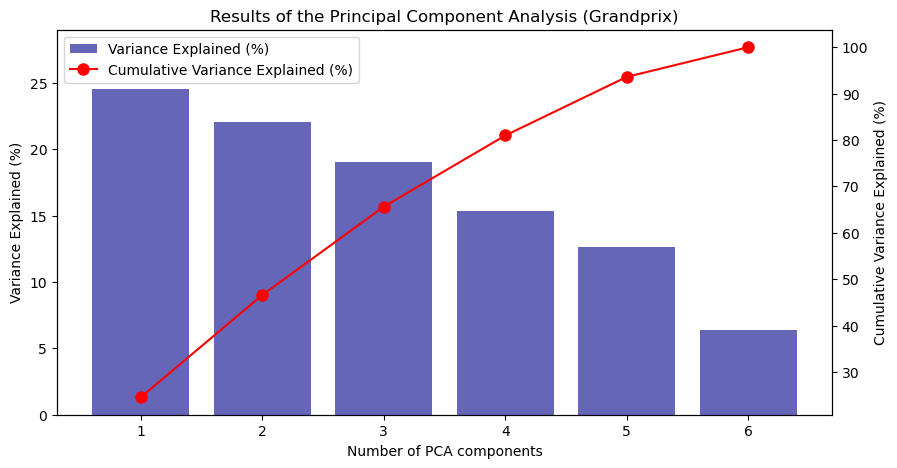

In [48]:
var_exp = pca_grandprix.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.6, align='center', color='darkblue', label='Variance Explained (%)')
ax1.set_ylim(0, 29)

ax2 = ax1.twinx()
ax2.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'r-o', markersize=8, label='Cumulative Variance Explained (%)')

ax1.set_xlabel('Number of PCA components')
ax1.set_ylabel('Variance Explained (%)')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax1.set_xticks(range(1, len(var_exp) + 1))

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.title('Results of the Principal Component Analysis (Grandprix)')
plt.show()

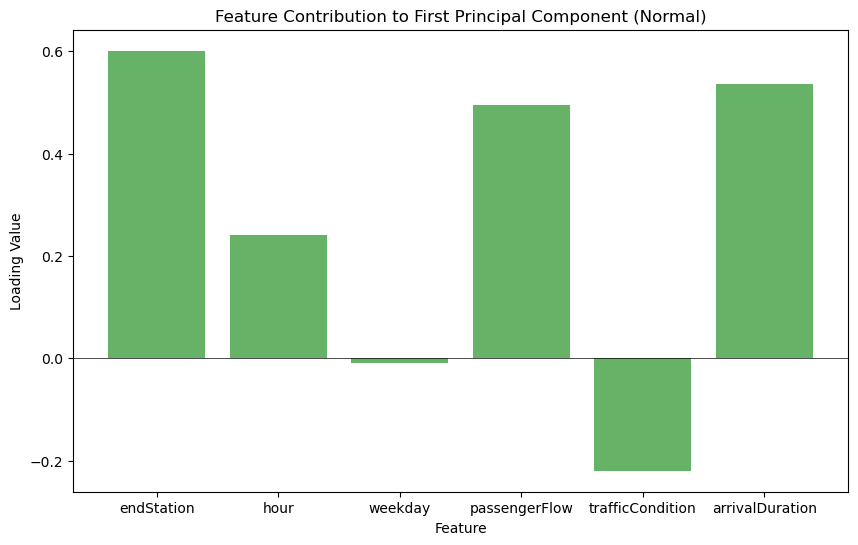

In [49]:
pc_normal = pca_normal.transform(bus_normal)
loadings_normal = pd.DataFrame(pca_normal.components_.T, columns=[f'PC{i+1}' for i in range(len(selected_feature))], index=selected_feature)

plt.figure(figsize=(10, 6))
plt.bar(loadings_normal.index, loadings_normal['PC1'], alpha=0.6, color='green')
plt.axhline(0, color='k', linewidth=0.5)
plt.title('Feature Contribution to First Principal Component (Normal)')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.show()

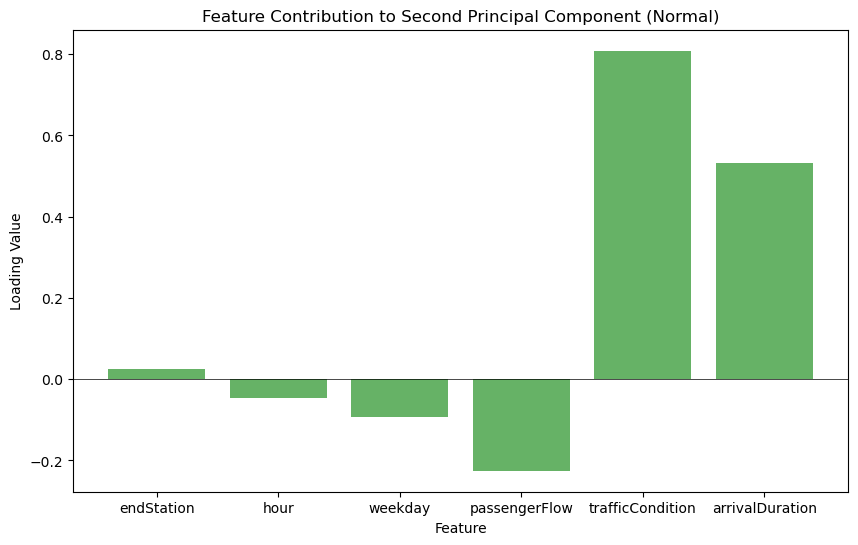

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(loadings_normal.index, loadings_normal['PC2'], alpha=0.6, color='green')
plt.axhline(0, color='k', linewidth=0.5)
plt.title('Feature Contribution to Second Principal Component (Normal)')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.show()

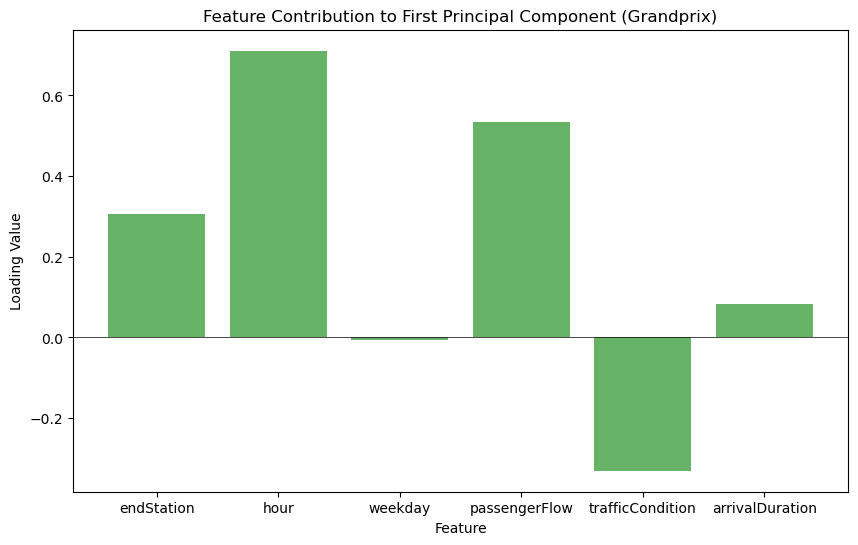

In [51]:
pc_grandprix = pca_grandprix.transform(bus_grandprix)
loadings_grandprix = pd.DataFrame(pca_grandprix.components_.T, columns=[f'PC{i+1}' for i in range(len(selected_feature))], index=selected_feature)

plt.figure(figsize=(10, 6))
plt.bar(loadings_grandprix.index, loadings_grandprix['PC1'], alpha=0.6, color='green')
plt.axhline(0, color='k', linewidth=0.5)
plt.title('Feature Contribution to First Principal Component (Grandprix)')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.show()

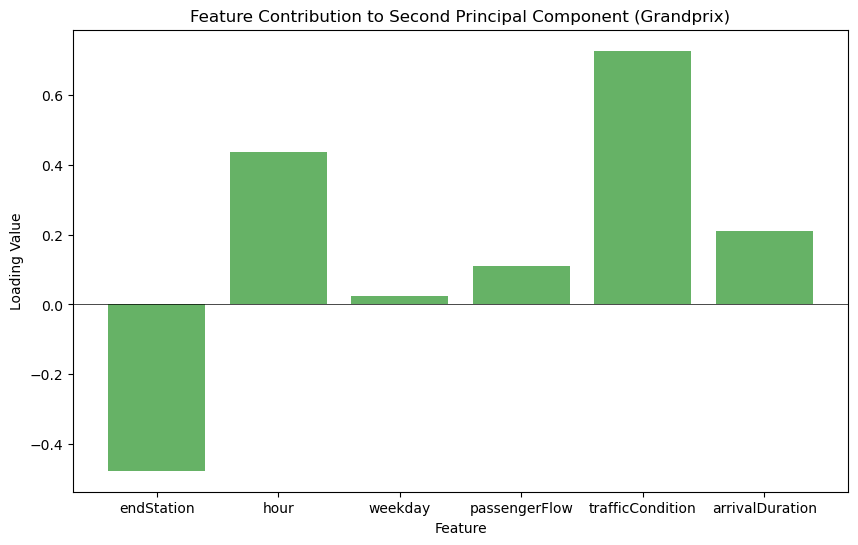

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(loadings_grandprix.index, loadings_grandprix['PC2'], alpha=0.6, color='green')
plt.axhline(0, color='k', linewidth=0.5)
plt.title('Feature Contribution to Second Principal Component (Grandprix)')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.show()

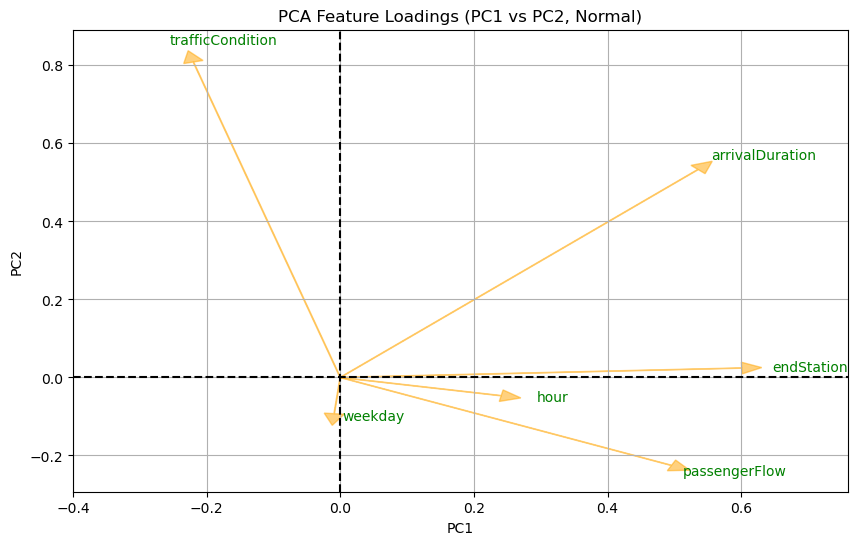

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(selected_feature)):
    ax.arrow(0, 0, loadings_normal.loc[selected_feature[i], 'PC1'], loadings_normal.loc[selected_feature[i], 'PC2'],
             head_width=0.03, head_length=0.03, color='orange', alpha=0.5)
    ax.text(loadings_normal.loc[selected_feature[i], 'PC1'] * 1.07 + 0.06, loadings_normal.loc[selected_feature[i], 'PC2'] * 1.07,
            selected_feature[i], color='g', ha='center', va='center')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-0.4, 0.76)
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')
ax.grid()
plt.title('PCA Feature Loadings (PC1 vs PC2, Normal)')
plt.show()

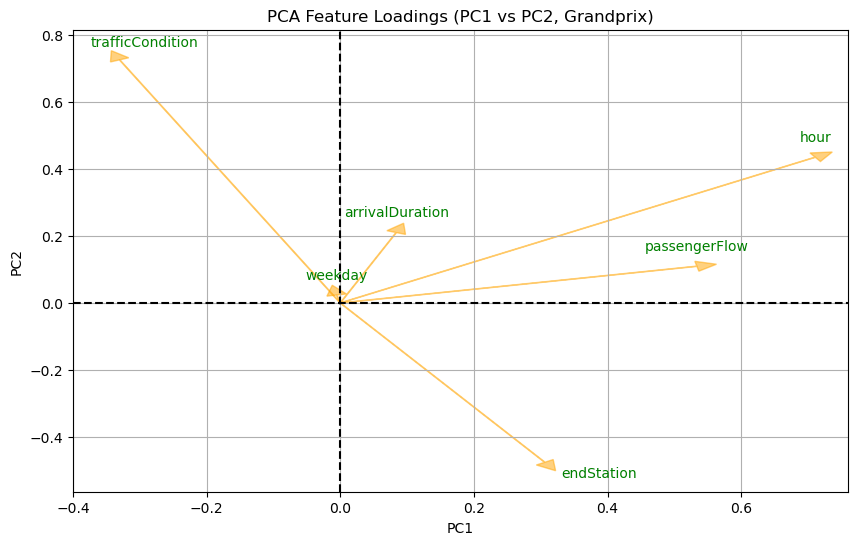

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(selected_feature)):
    ax.arrow(0, 0, loadings_grandprix.loc[selected_feature[i], 'PC1'], loadings_grandprix.loc[selected_feature[i], 'PC2'],
             head_width=0.03, head_length=0.03, color='orange', alpha=0.5)
    if (selected_feature[i] == 'arrivalDuration') | (selected_feature[i] == 'passengerFlow'):
        ax.text(loadings_grandprix.loc[selected_feature[i], 'PC1'], loadings_grandprix.loc[selected_feature[i], 'PC2'] + 0.06,
            selected_feature[i], color='g', ha='center', va='center')
        continue
    if (selected_feature[i] == 'hour') | (selected_feature[i] == 'weekday'):
        ax.text(loadings_grandprix.loc[selected_feature[i], 'PC1'], loadings_grandprix.loc[selected_feature[i], 'PC2'] + 0.06,
            selected_feature[i], color='g', ha='center', va='center')
        continue
    ax.text(loadings_grandprix.loc[selected_feature[i], 'PC1'] * 1.07 + 0.06, loadings_grandprix.loc[selected_feature[i], 'PC2'] * 1.07,
            selected_feature[i], color='g', ha='center', va='center')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-0.4, 0.76)
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')
ax.grid()
plt.title('PCA Feature Loadings (PC1 vs PC2, Grandprix)')
plt.show()